# International Soccer Matches, who scored more goals (Men Vs Women) - Wilcoxon-Mann-Whitney test

## Problem Statement

A major online sports media company, specializing in soccer analysis and reporting, wants to investigate that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that their subscribers are bound to love; however this study aims to perform a valid statistical hypothesis test to be sure.

## Objective

The project's main goal is to run the Wilcoxon-Mann-Whitney test, a non-parametric test, if data is skewed or does not meet the assumption of normality required for a t-test. It would test whether women's matches tend to have higher goals scored than men's matches.

## Research Question

> Are more goals scored in women's international soccer matches than men's?

Assuming a **10% significance level**, and the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

# Importing Libraries

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [39]:
men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")

In [40]:
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [41]:
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [43]:
# rows and columns of the dataset
print(men.shape)
print(women.shape)

(44353, 7)
(4884, 7)


In [53]:
print("men's datatype:\n", men.dtypes)

print("women's datatype:\n",women.dtypes)

men's datatype:
 Unnamed: 0     int64
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
dtype: object
women's datatype:
 Unnamed: 0     int64
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
dtype: object


### Change the datatype of date

In [54]:
men["date"] = pd.to_datetime(men["date"])

In [55]:
print("Range of Date and Time:", men["date"].min(), men["date"].max())

Range of Date and Time: 1872-11-30 00:00:00 2022-12-18 00:00:00


### For the analysis, I will use Official FIFA World Cup matches since 2002-01-01

In [57]:
men_subset = men[(men["date"] > "2002-01-01") & (men['tournament'].isin(["FIFA World Cup"]))]
men_subset

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup
...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup


In [9]:
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]
women_subset

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup
...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup


### Create group and goals_scored columns

In [61]:
men_subset["group"] = "men"

In [62]:
men_subset

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,men
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men
...,...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup,men
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,men
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,men
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,men


In [63]:
women_subset['group'] = 'women'

In [64]:
women_subset

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4
...,...,...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,women,3
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup,women,3
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,women,1
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup,women,3


In [65]:
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
men_subset

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,men,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men,1
...,...,...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup,men,3
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,men,3
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,men,2
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,men,3


In [66]:
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]
women_subset

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4
...,...,...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,women,3
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup,women,3
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,women,1
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup,women,3


### Determine Normality using histograms (Men's)

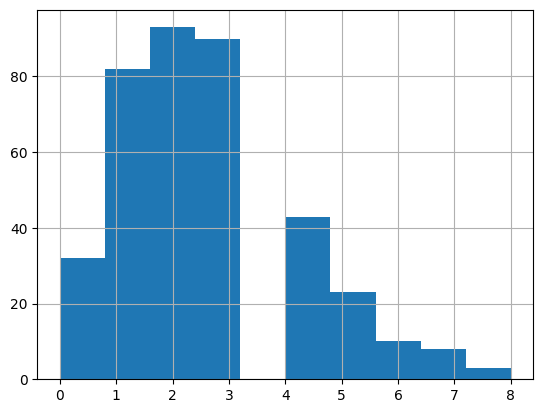

<Figure size 640x480 with 0 Axes>

In [67]:
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

<IPython.core.display.Javascript object>

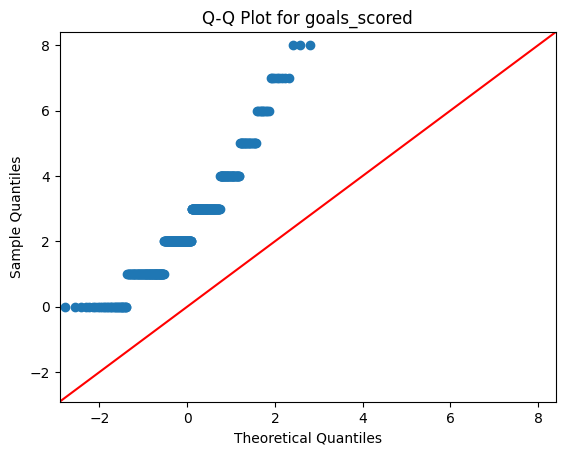

In [79]:
fig = sm.qqplot(men_subset["goals_scored"], line='45')
plt.title('Q-Q Plot for goals_scored')
plt.show()

<IPython.core.display.Javascript object>

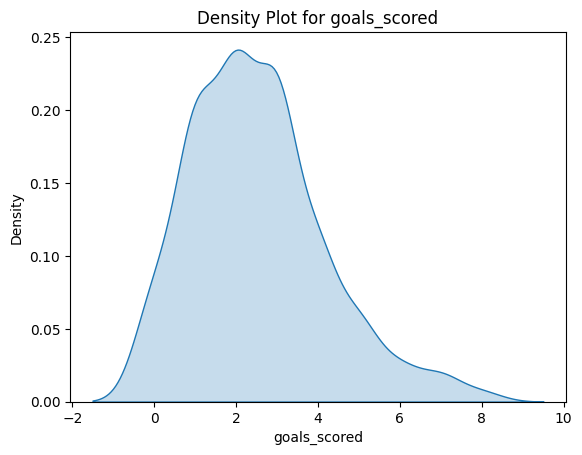

In [81]:
sns.kdeplot(men_subset["goals_scored"], fill=True)
plt.title('Density Plot for goals_scored')
plt.show()

### Determine Normality using histograms (Women's)

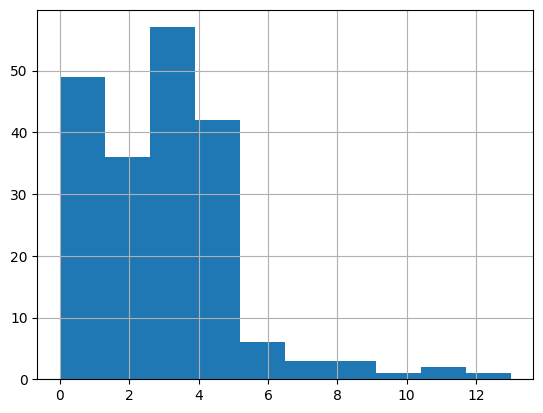

<Figure size 640x480 with 0 Axes>

In [68]:
women_subset['goals_scored'].hist()
plt.show()
plt.clf()

<IPython.core.display.Javascript object>

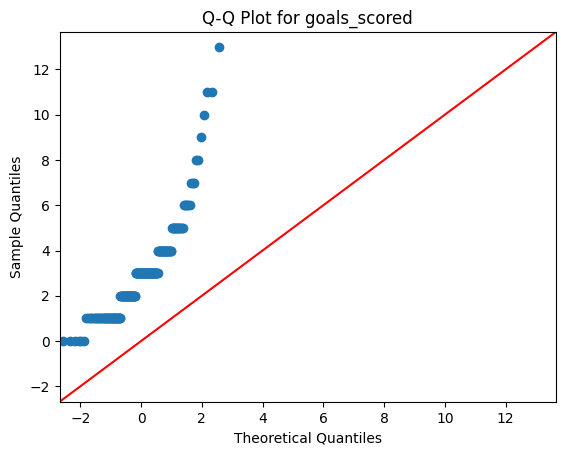

In [80]:
fig = sm.qqplot(women_subset["goals_scored"], line='45')
plt.title('Q-Q Plot for goals_scored')
plt.show()

<IPython.core.display.Javascript object>

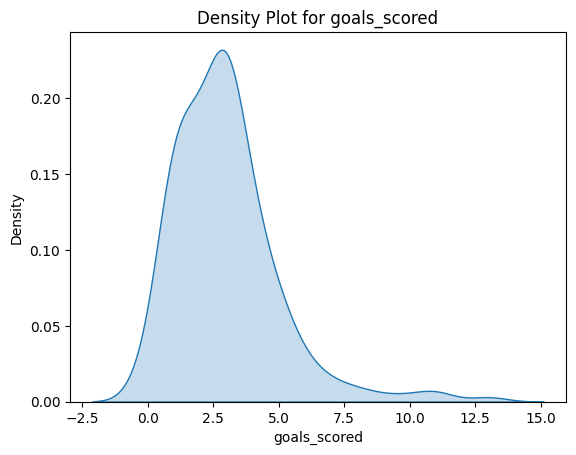

In [82]:
sns.kdeplot(women_subset["goals_scored"], fill=True)
plt.title('Density Plot for goals_scored')
plt.show()

#### Goals scored is not normally distributed, so Wilcoxon-Mann-Whitney test of two groups

In [69]:
# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)
both

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
0,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
2,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
3,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
4,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4
...,...,...,...,...,...,...,...,...,...
579,44343,2022-12-10,England,France,1,2,FIFA World Cup,men,3
580,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,men,3
581,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,men,2
582,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,men,3


In [70]:
both.head(2)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
0,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2


### Transform the data for pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test

In [72]:
both_subset = both[["goals_scored", "group"]]
both_subset.head(3)

,goals_scored,group
0,3,women
1,2,women
2,5,women


In [73]:
both_subset_wide = both_subset.pivot(columns="group", 
                                     values="goals_scored")
both_subset_wide

group,men,women
0,NaN,3.0
1,NaN,2.0
2,NaN,5.0
3,NaN,6.0
4,NaN,4.0
...,...,...
579,3.0,NaN
580,3.0,NaN
581,2.0,NaN
582,3.0,NaN


In [74]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

results_pg

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,0.126901,0.563451


In [35]:
# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

In [75]:
print("P-value:", p_val)

P-value: 0.005106609825443641


**Null: H(0):** The mean number of goals scored in women's international soccer matches is the same as the men's

**Alternate: H(A):** The mean number of goals scored in women's international soccer matches is greater than the men's

In [76]:
if p_val <= 0.01:
    result = "Reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as the men's"
else:
    result = "Fail to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is greater than the men's"

result_dict = {"p_val": p_val, "result":result}

In [77]:
print(result_dict)

{'p_val': 0.005106609825443641, 'result': "Reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as the men's"}


## Conclusion:

So, we have enough evidence to reject the null hypothesis. Hence, the goals scored in women's international matches is greater than men's